# Data analysis and pre proccessing

In [1]:
import pandas as pd
from langdetect import detect
import seaborn as sns
import matplotlib.pyplot as plt
import datasets
from nltk.corpus import stopwords
import nltk
import re
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/samu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/samu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
work_dir = './'

df_original = pd.read_csv(work_dir + 'music_album_reviews.csv')
df = df_original.copy()

In [4]:
empty_review_indices = df[(df['Review'].isnull()) | (df['Rating'].isnull())].index
df.drop(empty_review_indices, inplace=True)
print(f'Number of samples with some null value:\n- {len(empty_review_indices)} ({len(empty_review_indices)/len(df)*100:.2f}% of the set)')

Number of samples with some null value:
- 2109 (2.70% of the set)


                                              Review  Rating
0  i think i actually under-rate ok computer if a...     5.0
1  i get why radiohead rub a lot of people the wr...     5.0
2  i would like to think i am good about not lett...     4.5
3  there are radiohead devotees like there were o...     4.0
4  i wrote a shining excellent review for this al...     5.0


/var/folders/0v/5dr3zfdx0mx5m4fsb3h_ksn40000gn/T/ipykernel_35512/3077154708.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_clean, palette='viridis')


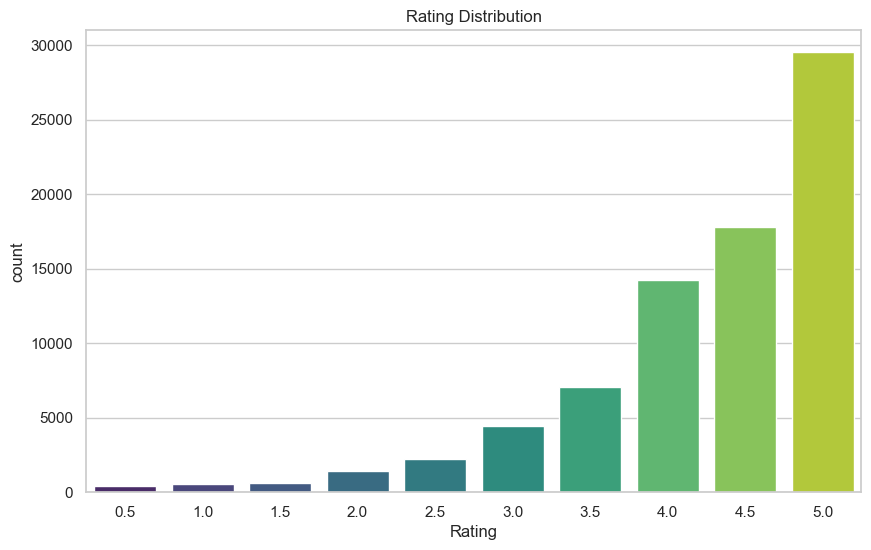

Rating
5.0    37.767713
4.5    22.759141
4.0    18.180190
3.5     9.014611
3.0     5.667716
2.5     2.826182
2.0     1.786034
1.5     0.818812
1.0     0.671682
0.5     0.507919
Name: proportion, dtype: float64
[(0.762373, 0.876424, 0.137064), (0.525776, 0.833491, 0.288127), (0.319809, 0.770914, 0.411152), (0.166383, 0.690856, 0.496502), (0.119512, 0.607464, 0.540218), (0.143343, 0.522773, 0.556295), (0.177423, 0.437527, 0.557565), (0.220057, 0.343307, 0.549413), (0.262138, 0.242286, 0.520837), (0.283072, 0.130895, 0.449241)]


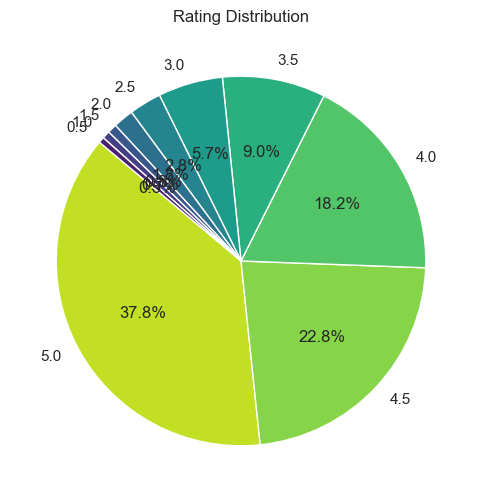

                                              Review  Rating   Rating2
0  i think i actually under-rate ok computer if a...     5.0  Positive
1  i get why radiohead rub a lot of people the wr...     5.0  Positive
2  i would like to think i am good about not lett...     4.5  Positive
3  there are radiohead devotees like there were o...     4.0  Positive
4  i wrote a shining excellent review for this al...     5.0  Positive
Rating2
Positive    93.389371
Negative     6.610629
Name: proportion, dtype: float64


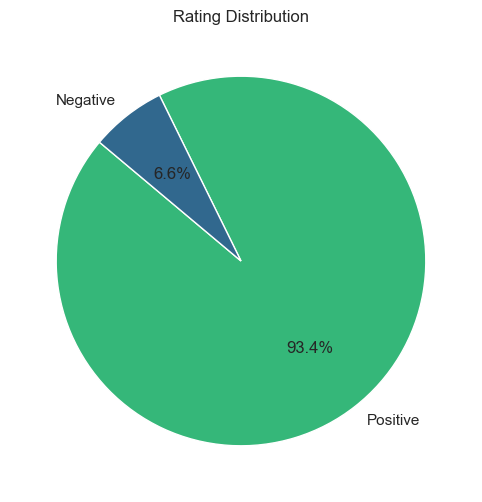

count    78162.000000
mean         4.253211
std          0.870954
min          0.500000
25%          4.000000
50%          4.500000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64
                                              Review  Rating   Rating2  \
0  i think i actually under-rate ok computer if a...     5.0  Positive   
1  i get why radiohead rub a lot of people the wr...     5.0  Positive   
2  i would like to think i am good about not lett...     4.5  Positive   
3  there are radiohead devotees like there were o...     4.0  Positive   
4  i wrote a shining excellent review for this al...     5.0  Positive   

   Review_length  
0           2644  
1           5418  
2           8391  
3           2574  
4           4433  
mean:  907.8470868196822
median:  428.0
std:  1449.8694166355085
max len:  32117
min len:  1


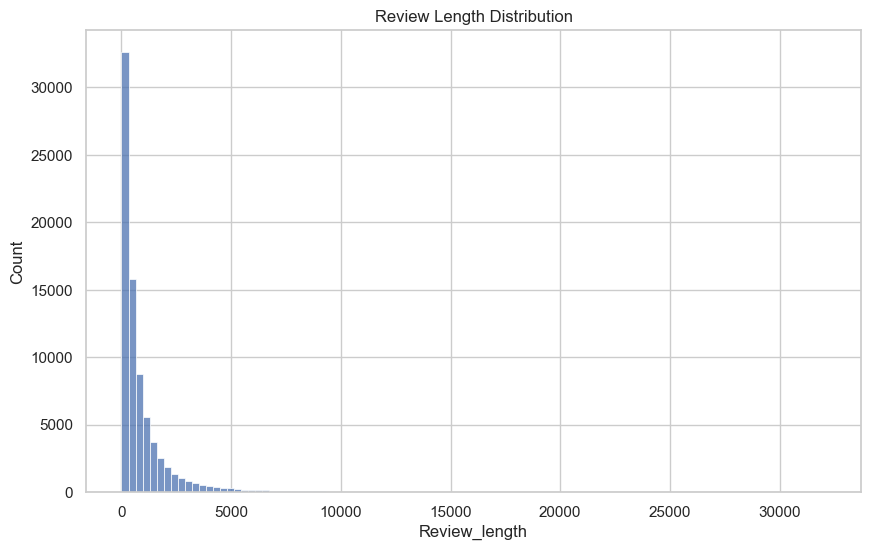

0.03698023644769047
                                              Review  Rating   Rating2  \
0  i think i actually under-rate ok computer if a...     5.0  Positive   
1  i get why radiohead rub a lot of people the wr...     5.0  Positive   
2  i would like to think i am good about not lett...     4.5  Positive   
3  there are radiohead devotees like there were o...     4.0  Positive   
4  i wrote a shining excellent review for this al...     5.0  Positive   

   Review_length  Polarity  
0           2644  0.195115  
1           5418  0.213229  
2           8391  0.263702  
3           2574  0.135962  
4           4433  0.179547  
0.20272903120236122
                                              Review  Rating   Rating2  \
0  i think i actually under-rate ok computer if a...     5.0  Positive   
1  i get why radiohead rub a lot of people the wr...     5.0  Positive   
2  i would like to think i am good about not lett...     4.5  Positive   
3  there are radiohead devotees like there we

<Figure size 1000x600 with 0 Axes>

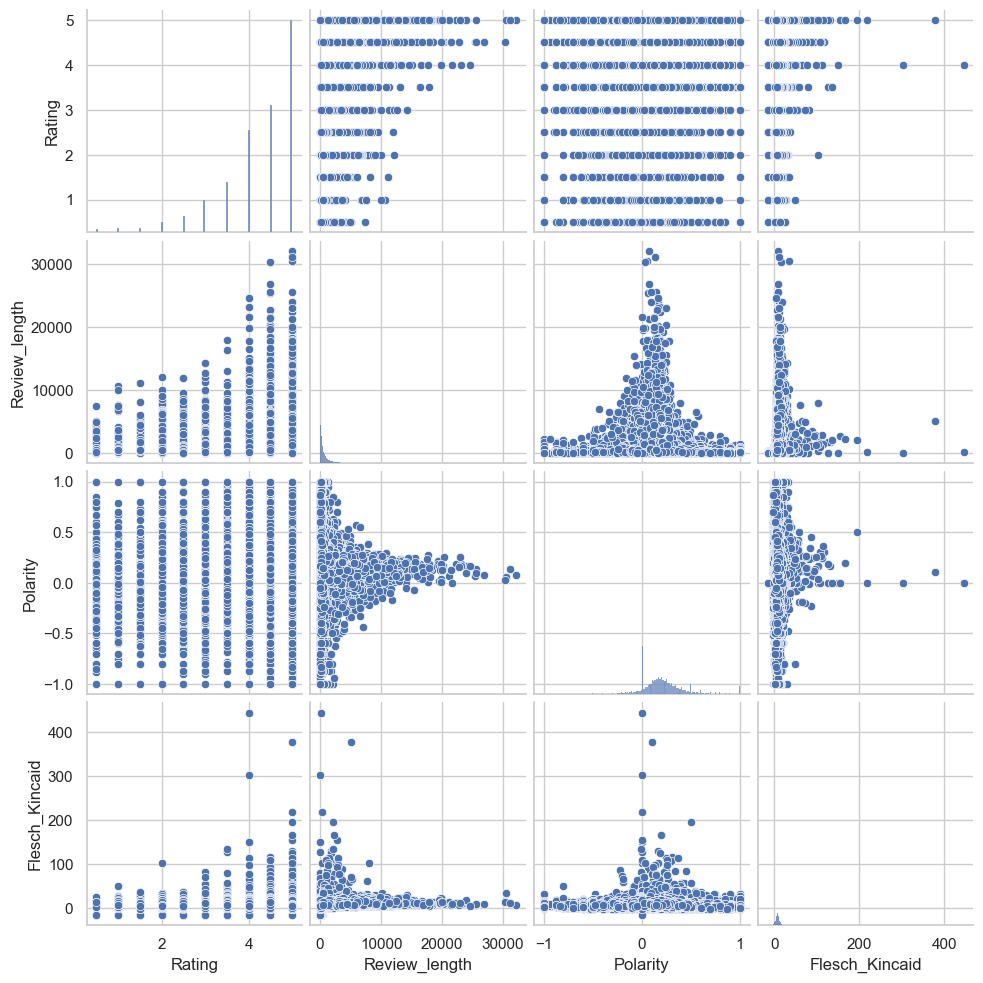

   FleschReadingEase  FleschKincaidGrade  SMOGIndex  ColemanLiauIndex  \
0              75.54                 7.9       10.0              6.96   
1              78.18                 6.9        9.7              8.12   
2              48.77                14.1       14.3             10.22   
3              61.67                 9.1       12.3             10.50   
4              77.16                 7.3       10.1              8.18   

   AutomatedReadabilityIndex  DaleChallReadabilityScore  DifficultWords  \
0                        9.1                       7.47              59   
1                        8.7                       8.10             140   
2                       16.0                       9.02             273   
3                       10.9                       9.13              88   
4                        9.2                       8.11             105   

   LinsearWriteFormula  GunningFog  Rating  
0            12.000000       10.38     5.0  
1             8.3333

<Figure size 1000x600 with 0 Axes>

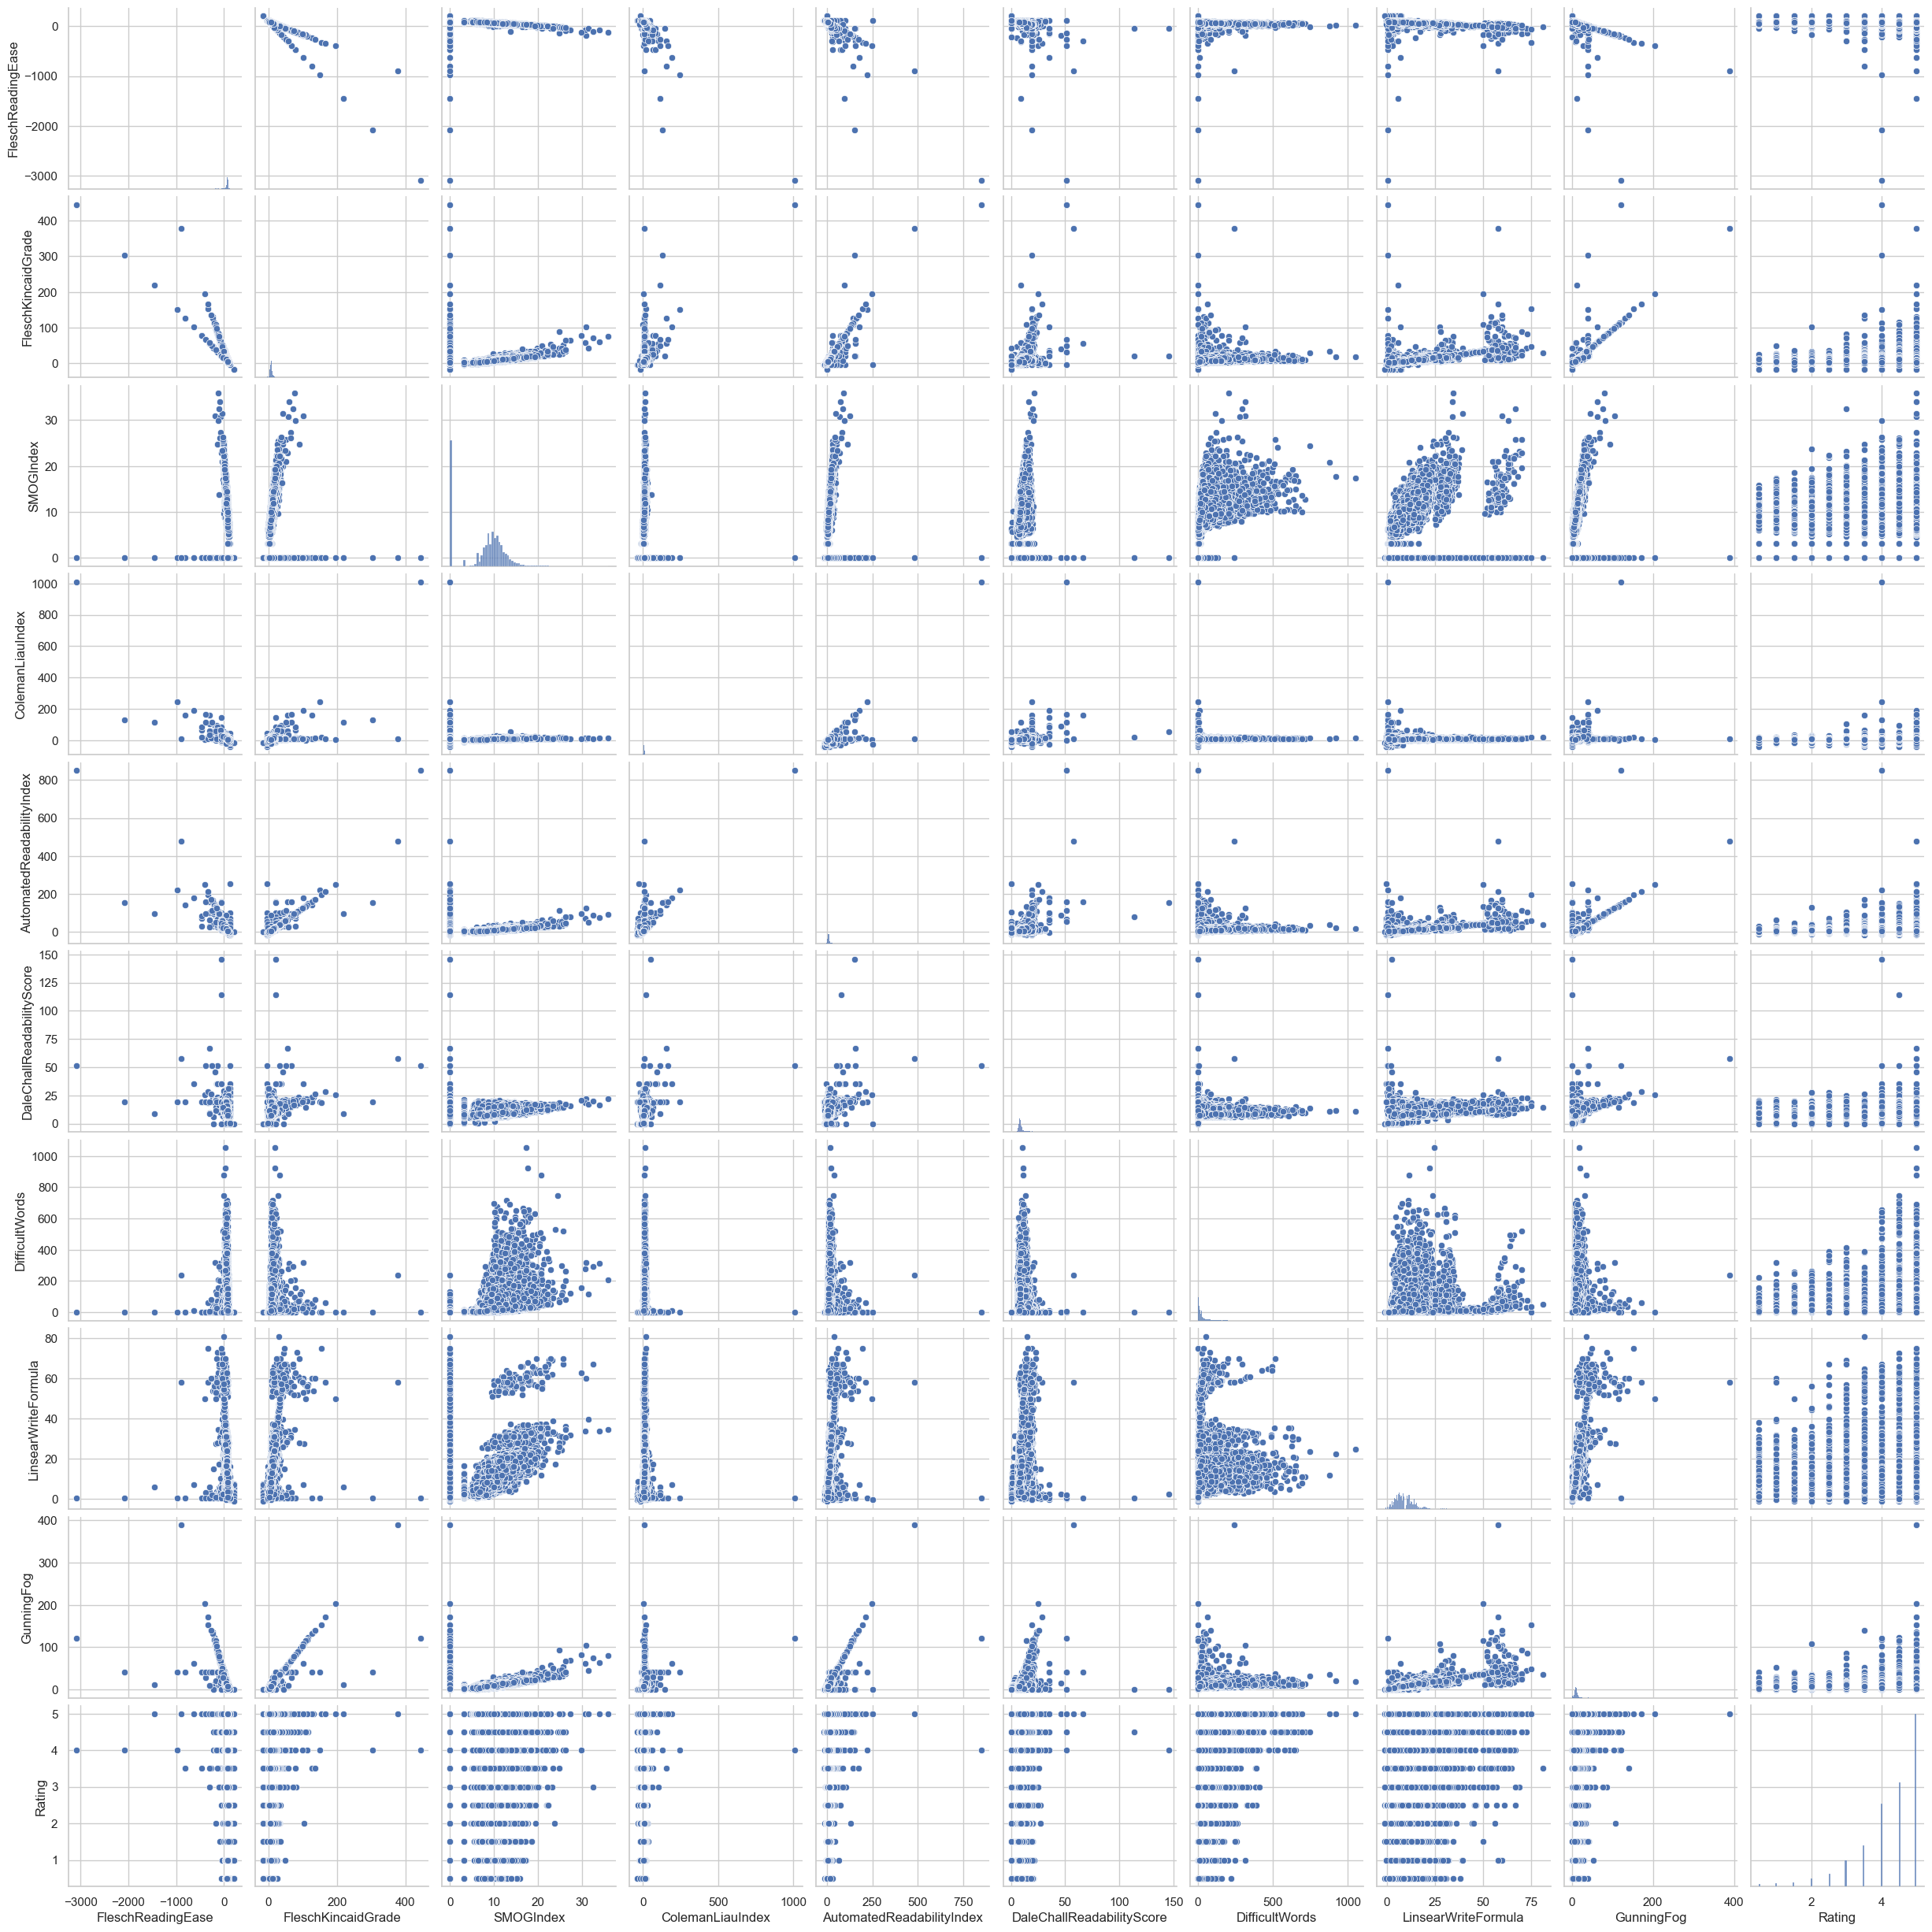

                           FleschReadingEase  FleschKincaidGrade  SMOGIndex  \
FleschReadingEase                   1.000000           -0.889038  -0.184095   
FleschKincaidGrade                 -0.889038            1.000000   0.274367   
SMOGIndex                          -0.184095            0.274367   1.000000   
ColemanLiauIndex                   -0.783060            0.604340   0.180849   
AutomatedReadabilityIndex          -0.792890            0.897025   0.209688   
DaleChallReadabilityScore          -0.461003            0.384884   0.006835   
DifficultWords                     -0.201653            0.286470   0.470571   
LinsearWriteFormula                -0.413190            0.693962   0.349566   
GunningFog                         -0.682702            0.895136   0.300802   
Rating                             -0.016709           -0.001011  -0.023629   

                           ColemanLiauIndex  AutomatedReadabilityIndex  \
FleschReadingEase                 -0.783060             

In [7]:
# STEP 1 IMPORT DATA

df_data_analysis = pd.read_csv('music_album_reviews.csv', header=None, skiprows=1)
df_data_analysis.columns = ['Review', 'Rating']
print(df_data_analysis.head())

df_clean = df_data_analysis.dropna(subset=['Rating'])
df_clean = df_data_analysis.dropna(subset=['Review'])

df_clean = df_clean.dropna(subset=['Rating'])
df_clean = df_clean.dropna(subset=['Review'])


sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df_clean, palette='viridis')
plt.title('Rating Distribution')
plt.show()

# compute percentage of all reviews respective to the rating
rating_percentage = df_clean['Rating'].value_counts(normalize=True) * 100
print(rating_percentage)

# make a figure with percentage to show the percentage of all reviews respective to the rating suing 'viridis'
# using someting like plt.pie(rating_percentage.values(), labels=rating_percentage.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(range(len(rating_percentage))))
# color like viridis and chanke for every different rating


colors = sns.color_palette('viridis', len(rating_percentage))
# swap colors
colors = colors[::-1]

# add also a table with the percentage of each rating
print(colors)
plt.figure(figsize=(10, 6))
plt.pie(rating_percentage.values, labels=rating_percentage.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Rating Distribution')
plt.show()

# create a new rating colum, with only two type of rating positive and negative, negatiev are rating <= 2.5 all other are positive
df_clean['Rating2'] = df_clean['Rating'].apply(lambda x: 'Negative' if x <= 2.5 else 'Positive')
print(df_clean.head())

# plot the distribution of the new rating column  using someting like plt.pie(rating_percentage.values(),  ...
# colors like viridis and chanke for every different rating
rating_percentage2 = df_clean['Rating2'].value_counts(normalize=True) * 100
print(rating_percentage2)

colors = sns.color_palette('viridis', len(rating_percentage2))
# swap colors
colors = colors[::-1]

plt.figure(figsize=(10, 6))
plt.pie(rating_percentage2.values, labels=rating_percentage2.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Rating Distribution')
plt.show()
# compute statistics for the rating column
rating_statistics = df_clean['Rating'].describe()
print(rating_statistics)

# plot the distribution of length of the reviews
df_clean['Review_length'] = df_clean['Review'].apply(lambda x: len(x))
print(df_clean.head())

# compute mean and median standard deviation of the length of the reviews
mean_review_length = df_clean['Review_length'].mean()
median_review_length = df_clean['Review_length'].median()
std_review_length = df_clean['Review_length'].std()

print("mean: ", mean_review_length)
print("median: ", median_review_length)
print("std: ", std_review_length)


# get max and min review length
max_review_length = df_clean['Review_length'].max()
min_review_length = df_clean['Review_length'].min()

print("max len: ", max_review_length)
print("min len: ", min_review_length)

# plot the distribution of the length of the reviews using sns.histplot
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Review_length'], bins=100)
plt.title('Review Length Distribution')
plt.show()


# search all possible combinations

# correlation between the length of the review and the rating
correlation = df_clean['Review_length'].corr(df_clean['Rating'])
print(correlation)

# correlation between polarity of the review and the rating
import textblob

df_clean['Polarity'] = df_clean['Review'].apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
print(df_clean.head())
correlation2 = df_clean['Polarity'].corr(df_clean['Rating'])
print(correlation2)

# correlation between the quality of grammar and the rating with Flesch-Kincaid using library textstat
import textstat

df_clean['Flesch_Kincaid'] = df_clean['Review'].apply(lambda x: textstat.flesch_kincaid_grade(x))
print(df_clean.head())

correlation3 = df_clean['Flesch_Kincaid'].corr(df_clean['Rating'])
print(correlation3)



print(correlation3)

plt.figure(figsize=(10, 6))
sns.pairplot(df_clean[['Rating', 'Review_length', 'Polarity', 'Flesch_Kincaid']])
plt.show()

# compute all metrics 
metrics = {
    'FleschReadingEase': df_clean['Review'].apply(textstat.flesch_reading_ease),
    'FleschKincaidGrade': df_clean['Review'].apply(textstat.flesch_kincaid_grade),
    'SMOGIndex': df_clean['Review'].apply(textstat.smog_index),
    'ColemanLiauIndex': df_clean['Review'].apply(textstat.coleman_liau_index),
    'AutomatedReadabilityIndex': df_clean['Review'].apply(textstat.automated_readability_index),
    'DaleChallReadabilityScore': df_clean['Review'].apply(textstat.dale_chall_readability_score),
    'DifficultWords': df_clean['Review'].apply(textstat.difficult_words),
    'LinsearWriteFormula': df_clean['Review'].apply(textstat.linsear_write_formula),
    'GunningFog': df_clean['Review'].apply(textstat.gunning_fog),
    'Rating': df_clean['Rating']  
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.head())

# plot the correlation between all metrics and the rating using sns.pairplot
plt.figure(figsize=(10, 6))
sns.pairplot(df_metrics)
plt.show()

# compute the correlation between all metrics and the rating
correlation_metrics = df_metrics.corr()
print(correlation_metrics)

correlation_metrics_for_rating = correlation_metrics['Rating']
print(correlation_metrics_for_rating)

In [6]:
def detect_lang(review: str) -> str:
    try:
        return detect(review)
    except:
        return 'unk'

languages = set()
df['language'] = df['Review'].apply(lambda x: detect_lang(str(x)))

In [7]:
lang_percent = df['language'].value_counts(normalize=True).mul(100).round(2).to_frame()
print(lang_percent)

          proportion
language            
en             90.29
es              3.26
fr              1.38
it              1.34
pt              0.92
pl              0.68
unk             0.48
de              0.33
nl              0.18
da              0.18
ro              0.13
af              0.09
no              0.09
ca              0.08
hu              0.07
cy              0.06
tl              0.05
sv              0.05
fi              0.05
tr              0.04
so              0.04
hr              0.03
et              0.03
lt              0.02
id              0.02
sw              0.02
sl              0.02
vi              0.02
sq              0.01
cs              0.01
sk              0.01
lv              0.00


In [11]:
num_english = len(df[df['language']=='en'])
num_english

70574

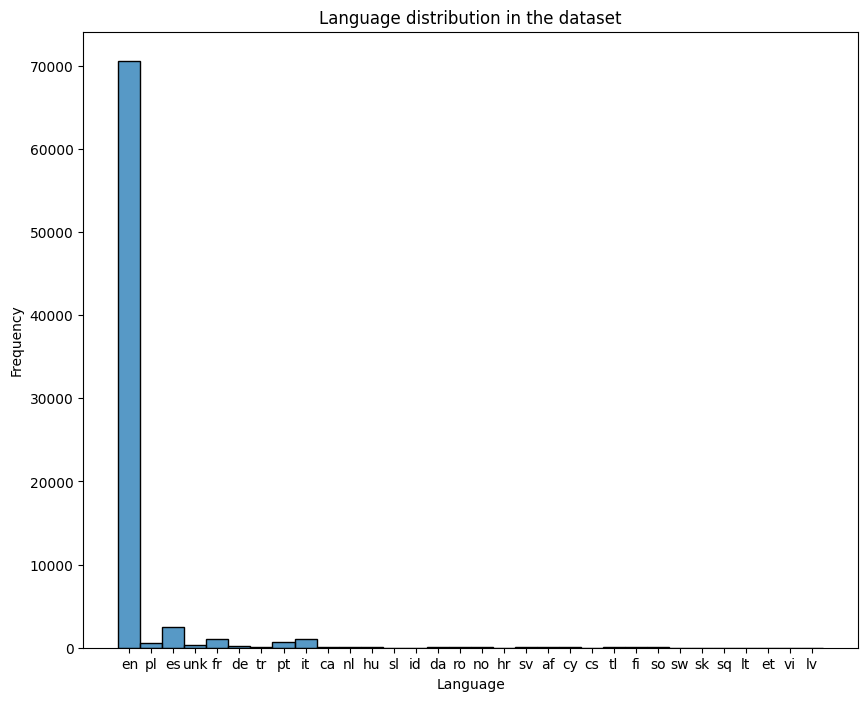

In [9]:
sns.histplot(df['language'], discrete=True)
plt.xlabel('Language')
plt.ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('Language distribution in the dataset')
plt.show()
fig.savefig(work_dir+'/language_distribution.png')

In [12]:

df_en = df[df['language']=='en']

In [13]:
(1-len(df_en)/len(df_original))*100

12.080327889275077

In [14]:
df_en = df_en.drop(columns=['language'], inplace=False).reset_index(drop=True).rename(columns={'Rating': 'label', 'Review': 'text'})
df_en

,text,label
0,i think i actually under-rate ok computer if a...,5.0
1,i get why radiohead rub a lot of people the wr...,5.0
2,i would like to think i am good about not lett...,4.5
3,there are radiohead devotees like there were o...,4.0
4,i wrote a shining excellent review for this al...,5.0
...,...,...
70569,my favorites here are the steamy lady cab driv...,3.0
70570,prince would have been well-advised to make th...,4.5
70571,you know you cannot say its not a classic beca...,3.5
70572,the classic prince album.,5.0


In [15]:
def has_emojis(text):
    emojis_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return bool(emojis_pattern.search(text))

print(f"No. of reviews with emojis: {df_en['text'].apply(has_emojis).sum()}")

No. of reviews with emojis: 0


In [22]:
id2label = {id: label for id, label in enumerate(sorted(df_en['label'].unique().tolist()))}
label2id = {label: id for id,label in id2label.items()}
df_en_save_1 = df_en.copy()

In [26]:
df_en = df_en_save_1.copy()

In [27]:
stop_words = set(stopwords.words('english'))
stop_words.remove('i')
lemmatizer = nltk.stem.WordNetLemmatizer()

def clean_text(review):
    review = review.lower()
    review = re.sub(r'[^\w\s]', '', review)
    return ' '.join([lemmatizer.lemmatize(word) for word in review.split() if word not in stop_words])

df_en['text'] = df_en['text'].apply(clean_text)
df_en = df_en.drop(df_en[df_en['text'].apply(lambda x: len(x) == 0)].index, inplace=False).dropna(subset=['text', 'label'], inplace=False).reset_index(drop=True)
df_en['label'] = df_en['label'].apply(lambda x: label2id[x])

In [28]:
train_df, val_df = train_test_split(df_en, test_size=0.8, stratify=df_en['label'], random_state=42, shuffle=True)
val_df, test_df = train_test_split(val_df, test_size=0.5, stratify=val_df['label'], random_state=42, shuffle=True)

# concat again to then use datasets library
df_en = pd.concat([train_df, val_df, test_df], ignore_index=True).reset_index(drop=True)

In [29]:
# Saving the cleaned dataset

processed_csv = 'music_album_reviews_processed.csv'
df_en.to_csv(work_dir+processed_csv, index=False)

print(df_en.head())

                                                text  label
0  beautiful dark twisted fantasy excellent retur...      9
1  hmmm i would say pretty solid album fine tune ...      6
2                      soul fire heard later release      7
3        predictably unpredictably predictable thumb      8
4  i lightweight jazz fan i could never argue int...      8


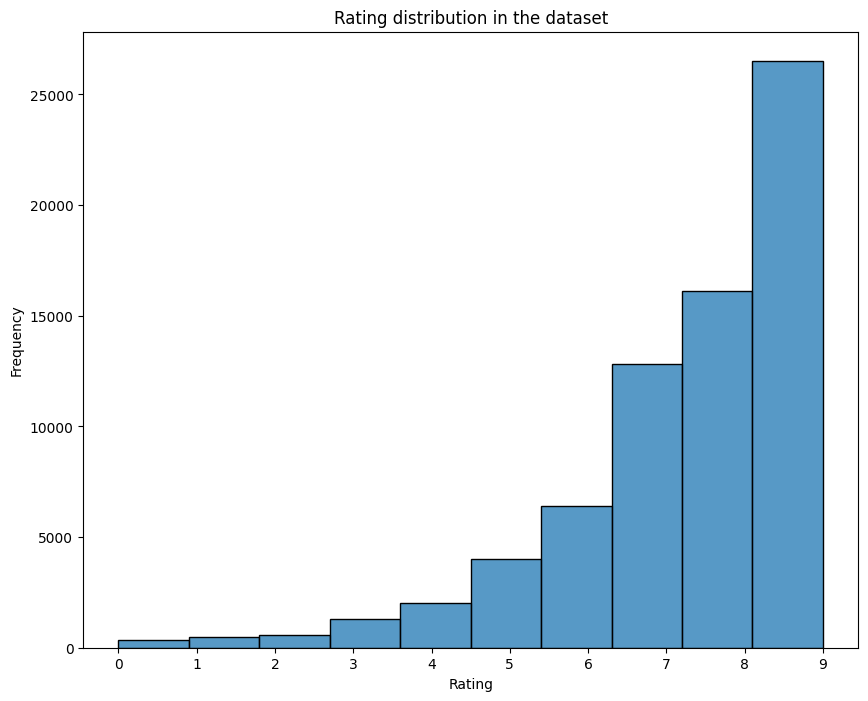

In [30]:
sns.histplot(df_en['label'], bins=df_en['label'].nunique())
plt.xlabel('Rating')
plt.ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('Rating distribution in the dataset')
plt.xticks(df_en['label'].unique().tolist())
plt.show()

In [ ]:
processed_csv = 'music_album_reviews_processed.csv'
work_dir = './'

ds = datasets.load_dataset('csv', data_files=work_dir+processed_csv, split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'])
ds = {l:d for d,l in zip(ds,['train','validation','test'])}
ds = datasets.DatasetDict(ds)
ds.save_to_disk(work_dir+'processed_datasetdict')

Generating train split: 0 examples [00:00, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/56457 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7057 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7057 [00:00<?, ? examples/s]



---



---


# uncased BERT based model

In [ ]:
import pandas as pd
import datasets
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding, AutoTokenizer
import evaluate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
work_dir = '/kaggle/input/data-analytics-1/'
df_en = pd.read_csv(work_dir+'music_album_reviews_processed.csv')
ds = datasets.load_from_disk(work_dir+'processed_datasetdict')

id2label = {0: 0.5, 1: 1.0, 2: 1.5, 3: 2.0, 4: 2.5, 5: 3.0, 6: 3.5, 7: 4.0, 8: 4.5, 9: 5.0}
label2id = {0.5: 0, 1.0: 1, 1.5: 2, 2.0: 3, 2.5: 4, 3.0: 5, 3.5: 6, 4.0: 7, 4.5: 8, 5.0: 9}

tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased')

def tokenizing_func(ds):
    return tokenizer(ds['text'], truncation=True, max_length=512)

ds_tokenized = ds.map(tokenizing_func, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=len(id2label),
    id2label=id2label, label2id=label2id
)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/57 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
output_dir = '/kaggle/working/'
training_args = TrainingArguments(
    output_dir= output_dir + "rating_prediction_model",
    learning_rate = 2e-4,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    num_train_epochs = 5,
    weight_decay = 0.001,
    evaluation_strategy = "steps",
    eval_steps = 0.1,
    save_strategy = "steps",
    gradient_accumulation_steps = 8,
    fp16 = True,
    logging_steps = 0.05,
    logging_strategy = 'steps',
    logging_dir = output_dir + "rating_prediction_model_logs",
    warmup_steps = 500
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_tokenized["train"],
    eval_dataset=ds_tokenized["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy
110,1.545300,1.459756,0.431486
220,1.447000,1.394898,0.440555
330,1.365700,1.386117,0.435312
440,1.362100,1.351973,0.462519
550,1.223200,1.427914,0.435738
660,1.238100,1.366193,0.462803
770,0.982100,1.481739,0.452459
880,0.964200,1.547441,0.426952
990,0.679700,1.816002,0.429361
1100,0.657400,1.840720,0.434462


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

TrainOutput(global_step=1100, training_loss=1.1587975588711825, metrics={'train_runtime': 6782.9311, 'train_samples_per_second': 41.617, 'train_steps_per_second': 0.162, 'total_flos': 3.307507481469e+16, 'train_loss': 1.1587975588711825, 'epoch': 4.99})

In [ ]:
output_dir = '/kaggle/working/'
training_info = pd.DataFrame(trainer.state.log_history)
training_info.to_csv(output_dir+'training_info', index=False)

In [ ]:
trainer.evaluate()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 1.8407196998596191,
 'eval_accuracy': 0.4344622360776534,
 'eval_runtime': 62.0179,
 'eval_samples_per_second': 113.79,
 'eval_steps_per_second': 3.563,
 'epoch': 4.99}

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
trainer.push_to_hub("bambalez/data-atalytics-1-non_aug")

training_args.bin:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/bambalez/rating_prediction_model/commit/c0eed5b919ca68013d3b7a0d1ae233b2eea8de30', commit_message='bambalez/data-atalytics-1-non_aug', commit_description='', oid='c0eed5b919ca68013d3b7a0d1ae233b2eea8de30', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
training_info = pd.read_csv('./training_info_kaggle')
training_info

,loss,grad_norm,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,1.6556,66530.375000,0.000022,0.25,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.5453,126212.546875,0.000044,0.50,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.50,110,1.459756,0.431486,60.3733,116.889,3.661,NaN,NaN,NaN,NaN,NaN
3,1.4669,104455.398438,0.000066,0.75,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.4470,122882.085938,0.000088,1.00,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.00,220,1.394898,0.440555,60.5544,116.540,3.650,NaN,NaN,NaN,NaN,NaN
6,1.3776,146939.890625,0.000110,1.25,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.3657,104219.789062,0.000132,1.50,330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,1.50,330,1.386117,0.435312,60.4037,116.831,3.659,NaN,NaN,NaN,NaN,NaN
9,1.3716,129222.648438,0.000154,1.75,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


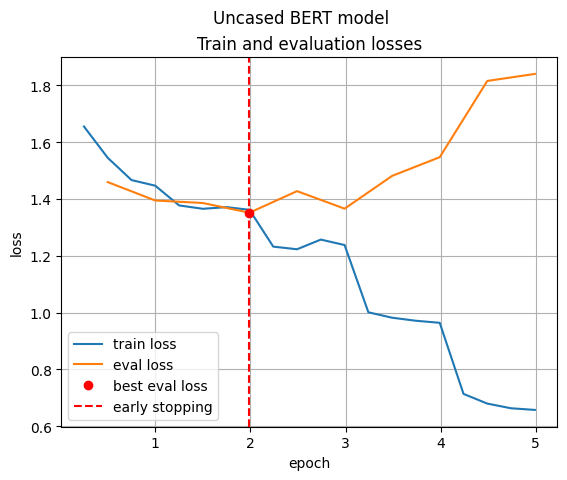

In [ ]:
train_losses = training_info[training_info['loss'].notnull()][['loss', 'epoch']]
eval_losses = training_info[training_info['eval_loss'].notnull()][['eval_loss', 'epoch']]
plt.plot(train_losses['epoch'], train_losses['loss'], label='train loss')
plt.plot(eval_losses['epoch'], eval_losses['eval_loss'], label='eval loss')
plt.xlabel('epoch')
plt.ylabel('loss')
min_eval_loss_idx = eval_losses['eval_loss'].idxmin()
plt.plot(eval_losses['epoch'][min_eval_loss_idx], eval_losses['eval_loss'][min_eval_loss_idx], 'ro', label='best eval loss')
plt.axvline(eval_losses['epoch'][min_eval_loss_idx], color='r', linestyle='--', label='early stopping')
plt.legend()
plt.suptitle('Uncased BERT model')
plt.title('Train and evaluation losses')
plt.grid()
plt.savefig('train_eval_losses.png')
plt.show()

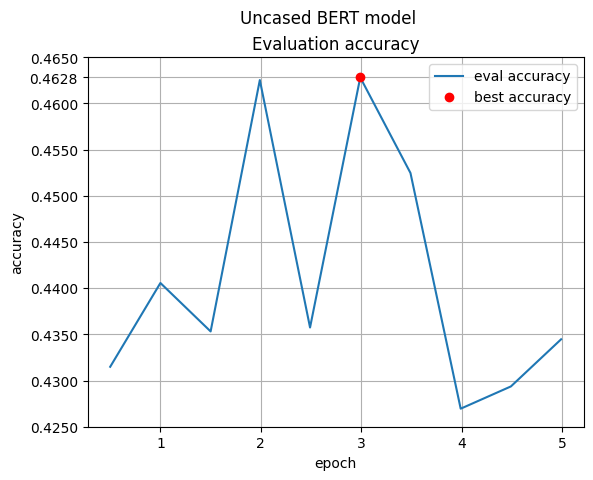

In [ ]:
train_accuracy = training_info[training_info['eval_accuracy'].notnull()][['eval_accuracy', 'epoch']]
plt.plot(train_accuracy['epoch'], train_accuracy['eval_accuracy'], label='eval accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
best_accuracy = train_accuracy['eval_accuracy'].idxmax()
plt.plot(train_accuracy['epoch'][best_accuracy], train_accuracy['eval_accuracy'][best_accuracy], 'ro', label='best accuracy')
plt.legend()
plt.yticks(list(plt.yticks()[0]) + [train_accuracy['eval_accuracy'][best_accuracy]])
plt.suptitle('Uncased BERT model')
plt.title('Evaluation accuracy')
plt.grid()
plt.savefig('eval_accuracy.png')
plt.show()


In [7]:
# Loading a checkpoint

model = AutoModelForSequenceClassification.from_pretrained('./kaggle/rating_prediction_model/checkpoint-500')

tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased')

df_en = pd.read_csv('./music_album_reviews_processed.csv')
ds = datasets.load_from_disk('./processed_datasetdict')

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

def tokenizing_func(ds):
    return tokenizer(ds['text'], truncation=True, max_length=512)

ds_tokenized = ds.map(tokenizing_func, batched=True)

id2label = {0: 0.5, 1: 1.0, 2: 1.5, 3: 2.0, 4: 2.5, 5: 3.0, 6: 3.5, 7: 4.0, 8: 4.5, 9: 5.0}
label2id = {0.5: 0, 1.0: 1, 1.5: 2, 2.0: 3, 2.5: 4, 3.0: 5, 3.5: 6, 4.0: 7, 4.5: 8, 5.0: 9}

training_args = TrainingArguments(
    output_dir= "./kaggle/rating_prediction_model_waste",
    learning_rate = 2e-4,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    num_train_epochs = 5,
    weight_decay = 0.001,
    evaluation_strategy = "steps",
    eval_steps = 0.1,
    save_strategy = "steps",
    gradient_accumulation_steps = 8,
    fp16 = True,
    logging_steps = 0.05,
    logging_strategy = 'steps',
    logging_dir = "./kaggle/rating_prediction_model_logs_waste",
    warmup_steps = 500
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_tokenized["train"],
    eval_dataset=ds_tokenized["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


C:\Users\fabia\AppData\Roaming\Python\Python311\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


  0%|          | 0/442 [00:00<?, ?it/s]

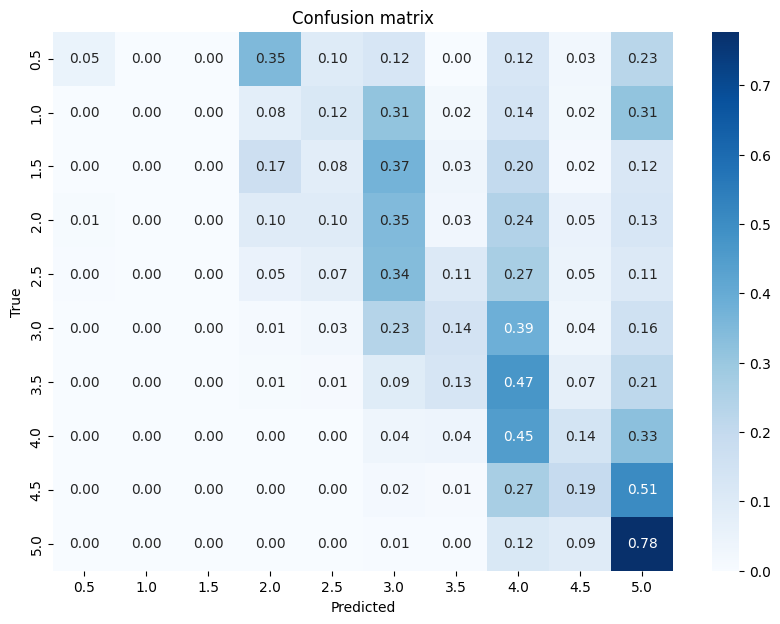

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = labels, columns = labels)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.2f')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.savefig('./kaggle/confusion_matrix.png')
    plt.show()

y_pred = trainer.predict(ds_tokenized['test'])
y_pred = np.argmax(y_pred.predictions, axis=1)
y_true = ds_tokenized['test']['label']
plot_confusion_matrix(y_true, y_pred, list(id2label.values()))



---



---


# uncased BERT based with weighted cross entropy model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import datasets
import torch
from torch import nn
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding, AutoTokenizer
import evaluate
import numpy as np


In [ ]:
work_dir = '/content/drive/MyDrive/Colab Notebooks/'
df_en = pd.read_csv(work_dir+'music_album_reviews_processed.csv')
ds = datasets.load_from_disk(work_dir+'processed_datasetdict')

In [ ]:
id2label = {0: 0.5, 1: 1.0, 2: 1.5, 3: 2.0, 4: 2.5, 5: 3.0, 6: 3.5, 7: 4.0, 8: 4.5, 9: 5.0}
label2id = {0.5: 0, 1.0: 1, 1.5: 2, 2.0: 3, 2.5: 4, 3.0: 5, 3.5: 6, 4.0: 7, 4.5: 8, 5.0: 9}

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased')

def tokenizing_func(ds):
    return tokenizer(ds['text'], truncation=True, max_length=512)

ds_tokenized = ds.map(tokenizing_func, batched=True)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=len(id2label),
    id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir= work_dir + "rating_prediction_model",
    learning_rate = 2e-4,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    num_train_epochs = 5,
    weight_decay = 0.001,
    evaluation_strategy = "steps",
    eval_steps = 0.1,
    save_strategy = "steps",
    gradient_accumulation_steps = 8,
    fp16 = True,
    logging_steps = 0.05,
    logging_strategy = 'steps',
    logging_dir = work_dir + "rating_prediction_model_logs",
    warmup_steps = 500
)

In [ ]:
y = df_en['label'].values
weights = torch.tensor(compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y), dtype=torch.float32).to(model.device)

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss


trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=ds_tokenized["train"],
    eval_dataset=ds_tokenized["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy
221,2.212900,1.979125,0.362335
442,1.974900,1.971303,0.368145
663,1.860500,1.928255,0.385575
884,1.829500,1.865879,0.395210
1105,1.581500,2.072021,0.345331
1326,1.554500,2.088257,0.416749
1547,1.329400,2.200878,0.397619
1768,1.295400,2.345553,0.396061
1989,1.068400,2.609281,0.405838


TrainOutput(global_step=2205, training_loss=1.5572881997037096, metrics={'train_runtime': 3660.146, 'train_samples_per_second': 77.124, 'train_steps_per_second': 0.602, 'total_flos': 2.79970985983092e+16, 'train_loss': 1.5572881997037096, 'epoch': 5.0})

In [ ]:
import pandas as pd
work_dir = '/content/drive/MyDrive/Colab Notebooks/'
training_info = pd.DataFrame(trainer.state.log_history)
training_info.to_csv(work_dir+'training_info', index=False)

In [ ]:
trainer.evaluate()

{'eval_loss': 2.6079814434051514,
 'eval_accuracy': 0.40215388975485333,
 'eval_runtime': 33.2041,
 'eval_samples_per_second': 212.534,
 'eval_steps_per_second': 13.312,
 'epoch': 5.0}

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
trainer.push_to_hub("bambalez/data-atalytics-1-non_aug-weigh_cross_entrop")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/bambalez/rating_prediction_model/commit/370c8991cebc7aea1ffd4f65cca451b6f40aba26', commit_message='bambalez/data-atalytics-1-non_aug-weigh_cross_entrop', commit_description='', oid='370c8991cebc7aea1ffd4f65cca451b6f40aba26', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
training_info = pd.read_csv('./training_info_google')
training_info

,loss,grad_norm,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,2.2129,2.422349,0.000044,0.25,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.50,221,1.979125,0.362335,30.5576,230.941,14.464,NaN,NaN,NaN,NaN,NaN
2,2.0145,5.925195,0.000089,0.50,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.9749,5.178045,0.000133,0.75,333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.00,442,1.971303,0.368145,30.4950,231.415,14.494,NaN,NaN,NaN,NaN,NaN
5,1.9430,2.459240,0.000178,1.01,444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.8605,3.283199,0.000194,1.26,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1.50,663,1.928255,0.385575,30.6706,230.090,14.411,NaN,NaN,NaN,NaN,NaN
8,1.8147,2.398020,0.000181,1.51,666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.8295,3.331395,0.000168,1.76,777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


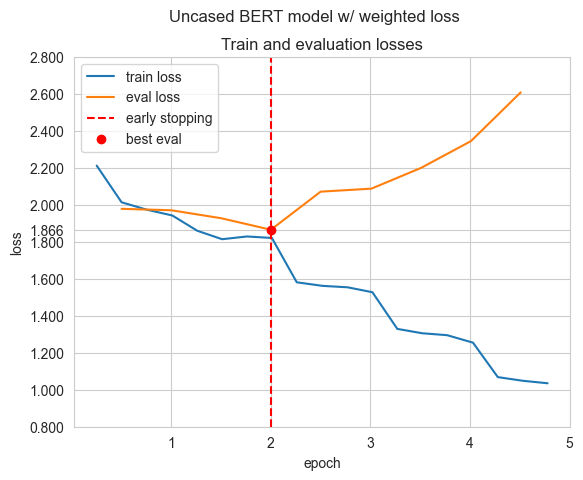

In [ ]:
train_losses = training_info[training_info['loss'].notnull()][['loss', 'epoch']]
eval_losses = training_info[training_info['eval_loss'].notnull()][['eval_loss', 'epoch']]
plt.plot(train_losses['epoch'], train_losses['loss'], label='train loss')
plt.plot(eval_losses['epoch'], eval_losses['eval_loss'], label='eval loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.axvline(x=2, color='r', linestyle='--', label='early stopping')
plt.plot(2, eval_losses[eval_losses['epoch']==2]['eval_loss'], 'ro', label='best eval')
plt.yticks(list(plt.yticks()[0]) + [eval_losses[eval_losses['epoch']==2]['eval_loss'].values[0]])
plt.legend()
plt.suptitle('Uncased BERT model w/ weighted loss')
plt.title('Train and evaluation losses')
plt.savefig('train_eval_losses_weighted.png')
plt.show()


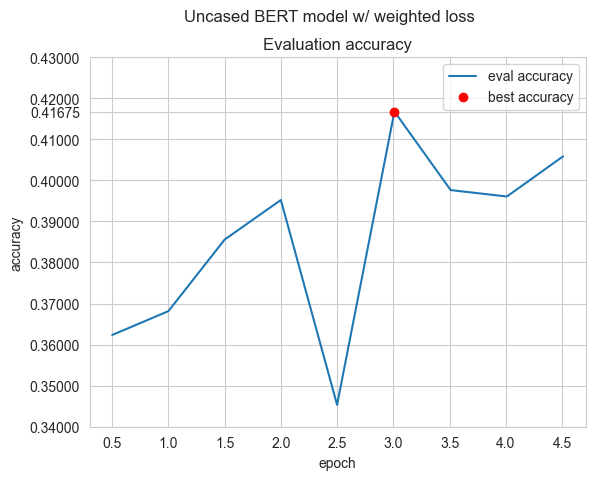

In [ ]:
train_accuracy = training_info[training_info['eval_accuracy'].notnull()][['eval_accuracy', 'epoch']]
plt.plot(train_accuracy['epoch'], train_accuracy['eval_accuracy'], label='eval accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
best_accuracy = train_accuracy['eval_accuracy'].idxmax()
plt.plot(train_accuracy['epoch'][best_accuracy], train_accuracy['eval_accuracy'][best_accuracy], 'ro', label='best accuracy')
plt.legend()
plt.yticks(list(plt.yticks()[0]) + [train_accuracy['eval_accuracy'][best_accuracy]])
plt.suptitle('Uncased BERT model w/ weighted loss')
plt.title('Evaluation accuracy')
plt.savefig('eval_accuracy_weighted.png')
plt.show()


In [4]:
# Loading a checkpoint

model = AutoModelForSequenceClassification.from_pretrained('./colab/rating_prediction_model/checkpoint-1000')

tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased')

df_en = pd.read_csv('./music_album_reviews_processed.csv')
ds = datasets.load_from_disk('./processed_datasetdict')

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

def tokenizing_func(ds):
    return tokenizer(ds['text'], truncation=True, max_length=512)

ds_tokenized = ds.map(tokenizing_func, batched=True)

id2label = {0: 0.5, 1: 1.0, 2: 1.5, 3: 2.0, 4: 2.5, 5: 3.0, 6: 3.5, 7: 4.0, 8: 4.5, 9: 5.0}
label2id = {0.5: 0, 1.0: 1, 1.5: 2, 2.0: 3, 2.5: 4, 3.0: 5, 3.5: 6, 4.0: 7, 4.5: 8, 5.0: 9}

training_args = TrainingArguments(
    output_dir= "./rating_prediction_model_waste",
    learning_rate = 2e-4,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    num_train_epochs = 5,
    weight_decay = 0.001,
    evaluation_strategy = "steps",
    eval_steps = 0.1,
    save_strategy = "steps",
    gradient_accumulation_steps = 8,
    fp16 = True,
    logging_steps = 0.05,
    logging_strategy = 'steps',
    logging_dir = "./rating_prediction_model_logs_waste",
    warmup_steps = 500
)

y = df_en['label'].values
weights = torch.tensor(compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y), dtype=torch.float32).to('cuda:0')

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss


trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=ds_tokenized["train"],
    eval_dataset=ds_tokenized["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


C:\Users\fabia\AppData\Roaming\Python\Python311\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


  0%|          | 0/442 [00:00<?, ?it/s]

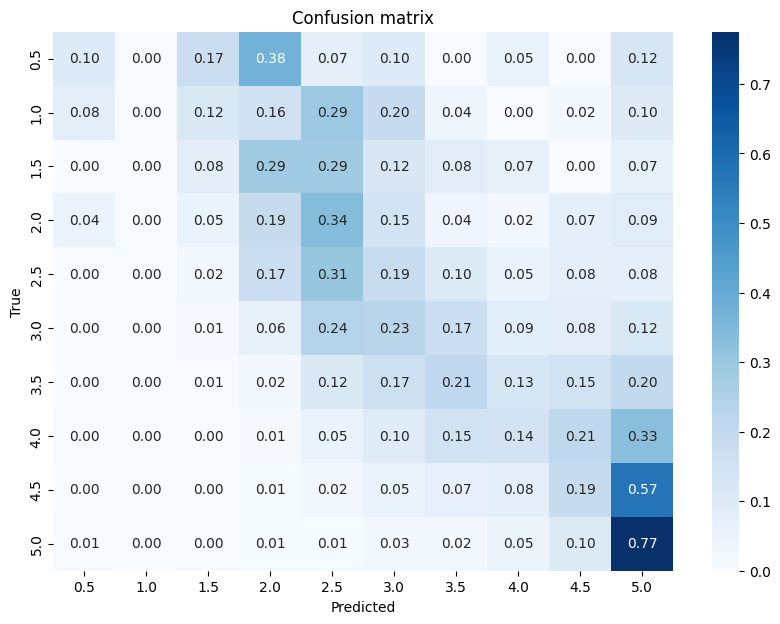

In [6]:
# plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = labels, columns = labels)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.2f')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.savefig('./colab/confusion_matrix_weighted.png')
    plt.show()

y_pred = trainer.predict(ds_tokenized['test'])
y_pred = np.argmax(y_pred.predictions, axis=1)
y_true = ds_tokenized['test']['label']
plot_confusion_matrix(y_true, y_pred, list(id2label.values()))



# XGBOOST

In [5]:
import numpy as np
import pandas as pd
import time
import datetime
import gc
import random
from nltk.corpus import stopwords
import re

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import transformers
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt


from langdetect import detect, LangDetectException
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


                                              Review  Rating
0  i think i actually under-rate ok computer if a...     5.0
1  i get why radiohead rub a lot of people the wr...     5.0
2  i would like to think i am good about not lett...     4.5
3  there are radiohead devotees like there were o...     4.0
4  i wrote a shining excellent review for this al...     5.0
78162
i think i actually under-rate ok computer anything. bonkers right? favourite album two decades - right exactly problem. i heard i 15 maybe fourth fifth album kind i would ever truly paid attention front-to-back first essentially forced upon parents general peer pressure school. first time i would ever decided might worth actually trying music real first album i ever landed happened best one? nah. far convenient. i keep side-eyeing uneasily i see sitting top favourite albums list. surely rush hearing cannot i hearing teenager. surely least one 3500 albums i heard since surpassed it. right?! yet i thought repeatedly well d

/var/folders/0v/5dr3zfdx0mx5m4fsb3h_ksn40000gn/T/ipykernel_37339/3915263581.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=balanced_labels, palette='viridis')


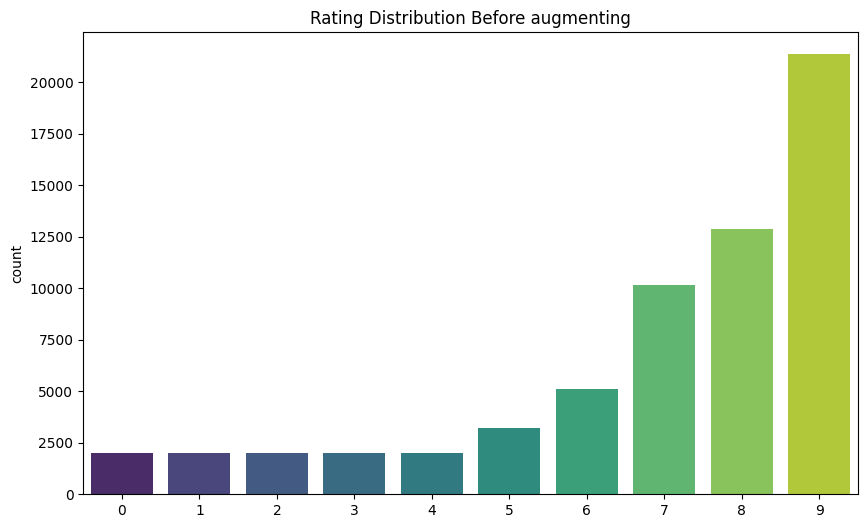

/var/folders/0v/5dr3zfdx0mx5m4fsb3h_ksn40000gn/T/ipykernel_37339/3915263581.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=balanced_labels, palette='viridis')


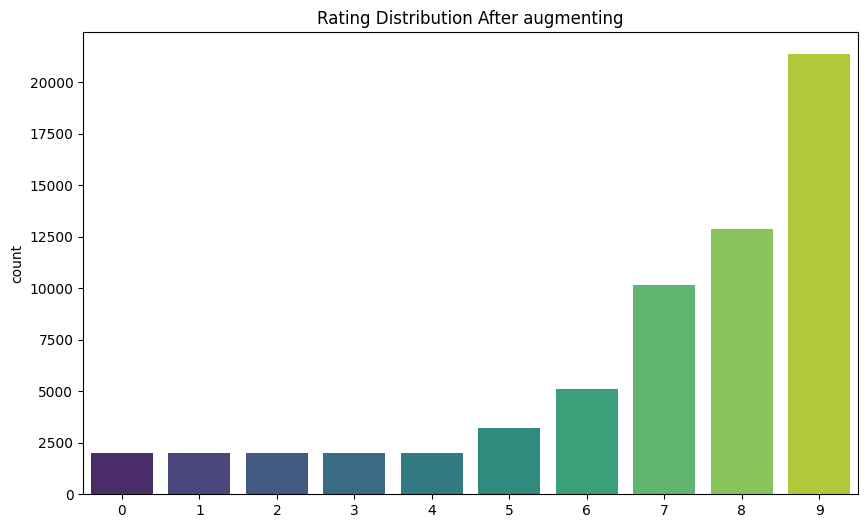

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


df = pd.read_csv('music_album_reviews.csv', header=None, skiprows=1)
df.columns = ['Review', 'Rating']
print(df.head())
df_clean = df.dropna(subset=['Rating'])

# remove null values in rating and review
df_clean = df_clean.dropna(subset=['Rating'])
df_clean = df_clean.dropna(subset=['Review'])


def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

print(len(df_clean))
df_clean = df_clean[df_clean['Review'].apply(is_english)]

# remove column with a nan values 
df_clean = df_clean.dropna(subset=['Rating'])
df_clean = df_clean.dropna(subset=['Review'])

sw = stopwords.words('english')
sw.remove('i')
    
def clean_text(text):
    # Lowe text
    text = text.lower()
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    text = " ".join(text) #removing stopwords
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) 
    
    return text

df_clean['Review'] = df_clean['Review'].apply(clean_text)

# now take laber and text
labels = df_clean['Rating'].values
reviews = df_clean['Review'].values

# convert labels from 0.5,1,...,5 to  0,1,2,3,...,9 
labels = labels - 0.5
labels = labels * 2


labels = labels.astype(int)

print(reviews[0])


# divide the data into training and testing 80 20
train_reviews, test_reviews, train_labels, test_labels = train_test_split(reviews, labels, test_size=0.2, random_state=42)
# save test data in one file
test_data = pd.DataFrame({'Review': test_reviews, 'Rating': test_labels})
test_data.to_csv('test_data.csv', index=False)


labels = train_labels
reviews = train_reviews

import nlpaug.augmenter.word as naw
from collections import Counter

def augment_text(text, aug, num_augmentations=1):
    augmented_texts = [aug.augment(text) for _ in range(num_augmentations)]
    return augmented_texts


label_counts = Counter(labels)
max_samples = max(label_counts.values()) 
aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")
max_samples = 2000
new_reviews = []
new_labels = []

for label in range(10): 
    current_reviews = [review for review, label_ in zip(reviews, labels) if label_ == label]
    num_to_augment = max_samples - label_counts[label] 
    print("Total new sample to make:   ", num_to_augment)
    print("label name: ", label)    
    while num_to_augment > 0:
            # select a random review from the current reviews
            review = random.choice(current_reviews)
            augmented_review = augment_text(review, aug, num_augmentations=1)[0]
            new_reviews.append(augmented_review)
            new_labels.append(label)
            num_to_augment -= 1

            #every 1000 print
            print("Augmented ", max_samples - num_to_augment, " samples")

balanced_reviews = np.append(reviews, new_reviews)
balanced_labels = np.append(labels, new_labels)

print("new size data", len(balanced_reviews))


label_counts = Counter(balanced_labels)
plt.figure(figsize=(10, 6))
sns.countplot(x=balanced_labels, palette='viridis')
plt.title('Rating Distribution After augmenting')
plt.show()

# save train data in one file
train_data = pd.DataFrame({'Review': balanced_reviews, 'Rating': balanced_labels})
train_data.to_csv('train_data.csv', index=False)

In [36]:
df = pd.read_csv('training_data.csv')
df_test_data = pd.read_csv('test_data.csv')
df = df.dropna()


# now take laber and text
reviews = df['Review'].values
labels = df['Rating'].values

reviews_test = df_test_data['Review'].values
labels_test = df_test_data['Rating'].values

# convert labels from 0.5,1,...,5 to  0,1,2,3,...,9 
# labels = labels - 0.5
# labels = labels * 2


labels = labels.astype(int)
labels_test = labels_test.astype(int)

# word level tf-idf

tfidf = TfidfVectorizer(analyzer='word', max_features=5000)
tfidf.fit(reviews)
X = tfidf.transform(reviews)
X_test = tfidf.transform(reviews_test)

# ngram level tf-idf 

tfidf_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features=5000)
tfidf_ngram.fit(reviews)
X_ngram = tfidf_ngram.transform(reviews)
X_test_ngram = tfidf_ngram.transform(reviews_test)

# character level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(reviews)
X_ngram_chars = tfidf_vect_ngram_chars.transform(reviews)
X_test_ngram_chars = tfidf_vect_ngram_chars.transform(reviews_test)

# concatenate all three features
X = np.hstack((X.toarray(), X_ngram.toarray(), X_ngram_chars.toarray()))
X_test = np.hstack((X_test.toarray(), X_test_ngram.toarray(), X_test_ngram_chars.toarray()))




In [37]:

X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size=0.2, random_state=42)

eval_set = [(X_val, y_val)]

classes_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
print(classes_weights)



model = XGBClassifier(
    max_depth=8, 
    min_child_weight=1, 
    gamma=0.3, 
    subsample=0.8, 
    colsample_bytree=0.8,
    reg_alpha=0.01, 
    reg_lambda=1,   
    early_stopping_rounds=10
)

model.fit(
    X_train,
    y_train,
    eval_metric="mlogloss",
    eval_set=eval_set,
    verbose=True,
    sample_weight=compute_sample_weight('balanced', y_train)
)





[2.17886534 2.17344527 2.21616994 2.17886534 2.166708   2.13233679
 1.33240564 0.65904205 0.52777107 0.32492562]


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:2.18257
[1]	validation_0-mlogloss:2.10266
[2]	validation_0-mlogloss:2.03670
[3]	validation_0-mlogloss:1.97841
[4]	validation_0-mlogloss:1.92512
[5]	validation_0-mlogloss:1.87679
[6]	validation_0-mlogloss:1.83456
[7]	validation_0-mlogloss:1.79415
[8]	validation_0-mlogloss:1.76334
[9]	validation_0-mlogloss:1.73187
[10]	validation_0-mlogloss:1.70470
[11]	validation_0-mlogloss:1.67708
[12]	validation_0-mlogloss:1.65451
[13]	validation_0-mlogloss:1.63031
[14]	validation_0-mlogloss:1.61153
[15]	validation_0-mlogloss:1.59158
[16]	validation_0-mlogloss:1.57249
[17]	validation_0-mlogloss:1.55516
[18]	validation_0-mlogloss:1.54100
[19]	validation_0-mlogloss:1.52584
[20]	validation_0-mlogloss:1.51293
[21]	validation_0-mlogloss:1.50049
[22]	validation_0-mlogloss:1.48991
[23]	validation_0-mlogloss:1.47944
[24]	validation_0-mlogloss:1.47051
[25]	validation_0-mlogloss:1.46055
[26]	validation_0-mlogloss:1.45015
[27]	validation_0-mlogloss:1.44196
[28]	validation_0-mlogloss:1.4

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

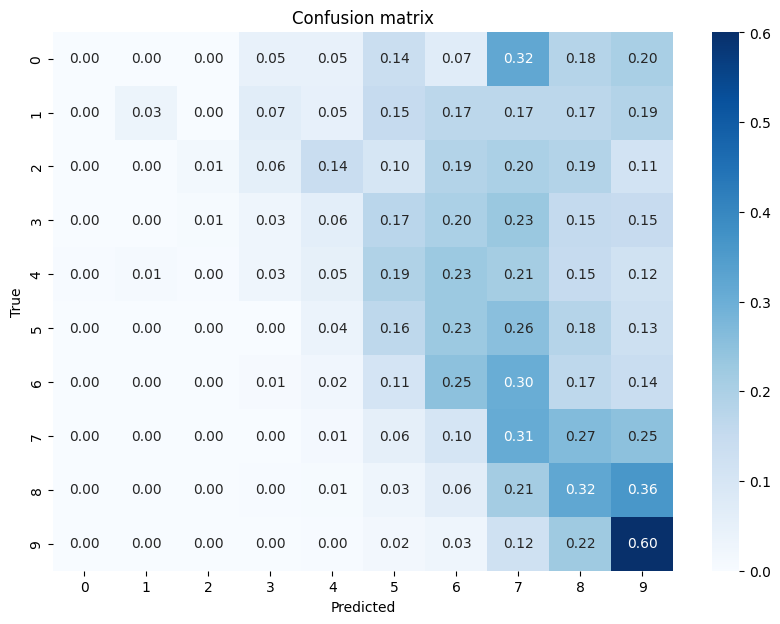

Accuracy:  0.3875968992248062
Accuracy: 0.7575392038600723
Number of confident predictions: 829
Number of total predictions: 9030


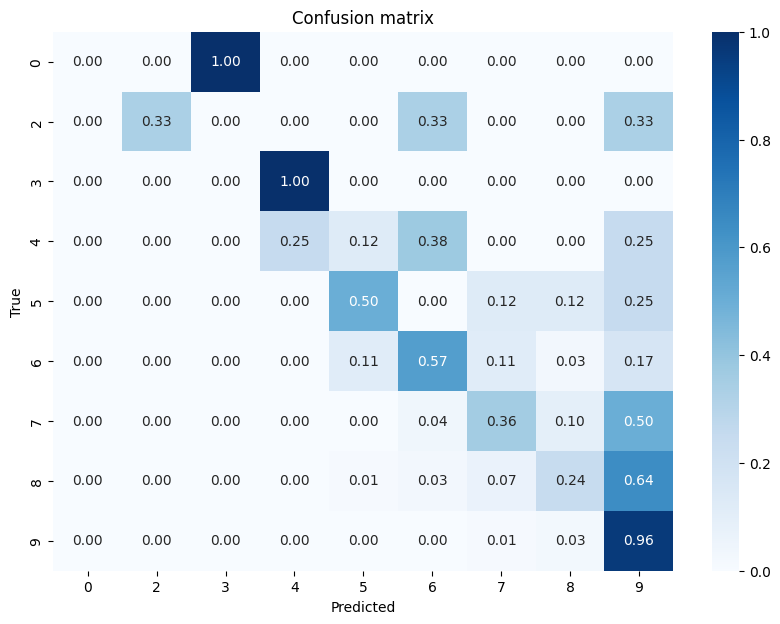

In [39]:
# plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = labels, columns = labels)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.2f')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.show()

y_pred = model.predict(X_test)
plot_confusion_matrix(labels_test, y_pred, np.unique(labels_test))

# print accuracy 
accuracy = np.sum(y_pred == labels_test) / len(labels_test)
print("Accuracy: ", accuracy)

# redo classificatio nwith confidence, only if the confidence is higher than 0.6
y_pred_proba = model.predict_proba(X_test)
confidence_threshold = 0.7
confident_predictions_mask = np.max(y_pred_proba, axis=1) > confidence_threshold

X_test_confident = X_test[confident_predictions_mask]
y_test_confident = labels_test[confident_predictions_mask]
y_pred_confident = np.argmax(y_pred_proba[confident_predictions_mask], axis=1)


accuracy = np.sum(y_test_confident == y_pred_confident) / len(y_test_confident)
print(f'Accuracy: {accuracy}')

# print number of confident predictions
print(f'Number of confident predictions: {len(y_test_confident)}')
# print number of total predictions
print(f'Number of total predictions: {len(labels_test)}')

# plot confusion matrix
# first remove the non confident predictions

plot_confusion_matrix(y_test_confident, y_pred_confident, np.unique(y_test_confident))




#

/var/folders/0v/5dr3zfdx0mx5m4fsb3h_ksn40000gn/T/ipykernel_37339/1764122952.py:16: RuntimeWarning: invalid value encountered in scalar divide
  accuracy = np.sum(y_test_bin == y_pred_bin) / len(y_test_bin)


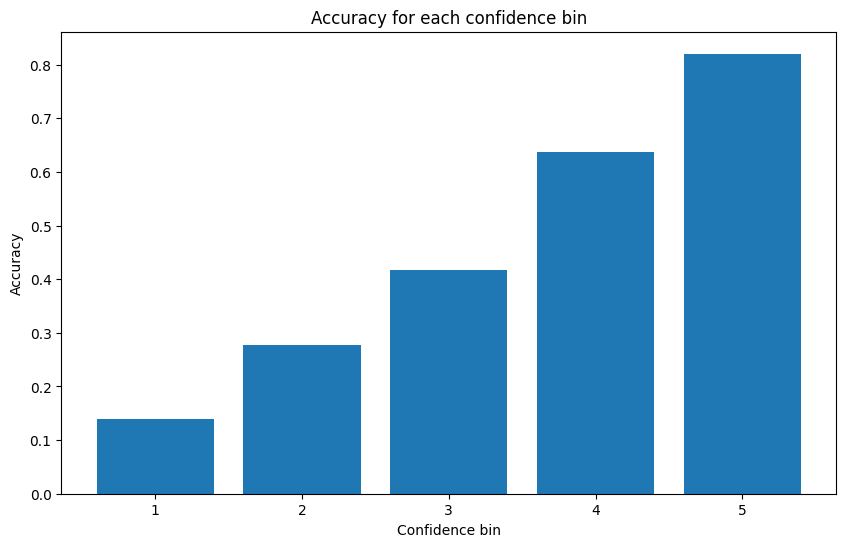

In [41]:
# check if confident is a good idea
# get the confidence for all predictions
y_pred_proba = model.predict_proba(X_test)

# divide confidence in 5 bins
# 0-0.2, 0.2-0.4, 0.4-0.6, 0.6-0.8, 0.8-1
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
y_pred_proba_bins = np.digitize(np.max(y_pred_proba, axis=1), bins)

# get the accuracy for each bin
accuracies = []
for bin in range(1, len(bins)+1):
    bin_mask = y_pred_proba_bins == bin
    y_test_bin = labels_test[bin_mask]
    y_pred_bin = np.argmax(y_pred_proba[bin_mask], axis=1)
    accuracy = np.sum(y_test_bin == y_pred_bin) / len(y_test_bin)
    accuracies.append(accuracy)

# plot the accuracy for each bin
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(bins)+1), accuracies)
plt.xlabel('Confidence bin')
plt.ylabel('Accuracy')
plt.title('Accuracy for each confidence bin')
plt.show()
